### CS224N Winter 2020, hmei0411@stanford.edu

### Assignment 2: word2vec

#### 1.a  Show that: $ - \sum_{w \in \text{Vocab}} y_w \log \hat y_w = -\log ( \hat y_o ) $, answer should be in one line.

$\textbf{Answer}$: The ground truth $y_w$ is a one-hot-vector with only the component w.r.t. the outside word being 1, the only term left is $-\log ( \hat y_o )$ 

#### 1.b Compute the partial derivative of $J_{naive-softmax}(v_c, o, U)$ w.r.t. $v_c$.
Write equations with matrices and vectors:
$$
\begin{align}
J_{naive-softmax}(v_c,o,U) &= -\log \hat y_o = -y^T \cdot \log(\hat y)  \\
\hat y &= p(\circ | v_c) = \frac{\exp(e)}{\sum \exp (e)} \\
e &= U^T v_c
\end{align}
$$


Use chain rule of derivatives: $$\frac{\partial J}{\partial v_c} = \frac{\partial J}{\partial \hat y} \frac{\partial \hat y}{\partial e} \frac{\partial e}{\partial v_c}$$.   
For the first part and the last part, apply derivative rules w.r.t. vectors and matrices directly:

$$
\begin{align}
\frac{\partial J}{\partial \hat y} &= -y \circ \frac{1}{\hat y}   \\
\frac{\partial e}{\partial v_c} &= U
\end{align}
$$

For the second part, take the derivative element wise:
1. If $i \ne o$, we have: $$\frac{\partial \hat y_i}{\partial e_o} = - \frac{\exp(e_o) \exp(e_i)}{ (\sum_{w=1}^V \exp(e_w))^2} = \hat y_i \hat y_o = \hat y_i (y_i - \hat y_o) $$
2. If $i = o$, we have:
$$
\frac{\partial \hat y_o}{\partial e_o} = \frac{\exp(e_o)}{\sum_{w=1}^V \exp(e_w)} - \frac{(\exp(e_o))^2}{ (\sum_{w=1}^V \exp(e_w))^2} = \hat y_o (y_o - \hat y_o)
$$
  
3. Combine the above 2:
$$
\frac{\partial \hat y}{\partial e} = (y - \hat y) \circ \hat y
$$

Put all 3 parts together:
$$
\begin{align}
\frac {\partial J}{\partial v_c} &= -\frac{1}{\hat y} \circ y \circ \hat y \circ (y  - \hat y)\cdot U \\
&=  (\hat y  -  y ) \cdot U
\end{align}
$$

Since $v_c$ is a D-dimentional vector, the derivative of J w.r.t. $v_c$ is also a D-dimentional vector.

#### 1.c Compute the partial derivative of $J_{naive-softmax}(v_c, o, U)$ w.r.t. $u_w$

Use the chain rule of derivatives again:
$$
\frac{\partial J}{\partial U} = \frac{\partial J}{\partial \hat y} \frac{\partial \hat y}{\partial e} \frac{\partial e}{\partial U}
$$

The chain rule of derivatives will have two terms in common compared to 1.b:  
$$
\begin{align}
\frac{\partial J}{\partial \hat y} &= -y \circ \frac{1}{\hat y}   \\
\frac{\partial \hat y}{\partial e} &= (y - \hat y) \circ \hat y
\end{align}
$$

The first two terms are the same, the third term is:


$$
\begin{align}
\frac{\partial e}{\partial U} &= \frac{\partial (U^T v_c)}{\partial U} = v_c
\end{align}
$$
  

Combine the above 2 cases and consider the result is a DxD matrix, we have: 
$$
\begin{align}
\frac {\partial J}{\partial U} &= -\frac{1}{\hat y} \circ y \circ \hat y \circ (y  - \hat y) \otimes v_c \\
\frac {\partial J}{\partial U} &=  (\hat y - y) \otimes v_c
\end{align}
$$

Here $\otimes$ denotes outer product.

#### 1.d Derivative of sigmoid function
Given: 
$$\begin{align}
\sigma(x) &= \frac {1} {1 + \exp(-x)} \\
 &= \frac {\exp(x)} {1 + \exp(x)} \\
  &= \exp(x)\frac {1} {1 + \exp(x)} 
\end{align}$$

The derivative w.r.t. x is:
$$\begin{align}
\sigma'(x) &= (\exp(x))'\frac {1} {1 + \exp(x)} + \exp(x)(\frac {1} {1 + \exp(x)})'  \\
 &= \frac {\exp(x)} {1 + \exp(x)} + \exp(x) \frac {\exp(x)} {(1 + \exp(x))^2} \\
 &= \frac {\exp(x)} {1 + \exp(x)} (1 - \frac {\exp(x)} {1 + \exp(x)})  \\
 &= \sigma(x)(1 - \sigma(x))
\end{align}$$

#### 1.e Gradient w.r.t center/output word vectors when using negative sampling loss

$$
\begin{align}
J_{neg-sample}(v_c,o,U) &= -\log(\sigma(u_o^T v_c)) - \sum_{k=1}^K \log(\sigma(-u_k^T v_c)) \\
\sigma(u_o^Tv_c) &= \frac{1}{1 + \exp(-u_o^Tv_c)} 
\end{align}
$$ 

1. Derivative w.r.t. $v_c$ will contain two terms summed together for the expected and negative each <br>

$$
\begin{align}
\frac{\partial J}{\partial v_c} &= 
\frac{\partial J}{\partial(-log(\sigma(u_o^Tv_c)))} \frac{\partial(-log(\sigma(u_o^Tv_c)))}{\partial u_o^Tv_c} \frac{\partial u_o^Tv_c}{\partial v_c} \\
&+  \frac{\partial J}{\partial(-\sum_{k=1}^K log(\sigma(-u_k^Tv_c)))} \frac{\partial(-\sum_{k=1}^K log(\sigma(-u_k^Tv_c)))}{\partial u_o^Tv_c} \frac{\partial u_o^Tv_c}{\partial v_c} \\
&= -\frac{1}{\sigma(u_o^Tv_c)} \sigma(u_o^Tv_c)(1 - \sigma(u_o^Tv_c))u_o  \\
&+ \sum_{k=1}^K (\frac{1}{\sigma(-u_k^Tv_c)} \sigma(-u_k^Tv_c)(1 - \sigma(-u_k^Tv_c))u_k) \\
&= -(1 - \sigma(u_o^Tv_c))u_o + \sum_{k=1}^K (1 - \sigma(-u_k^Tv_c))u_k
\end{align}
$$

2. Derivative w.r.t. $u_o$ contains only one term because $o \notin {1,2,...,K}$  
$$
\begin{align}
\frac {\partial J}{\partial u_o} &= -\frac{1}{\sigma(u_o^Tv_c)} \sigma(u_o^Tv_c)(1 - \sigma(u_o^Tv_c))v_c  \\
&= -(1 - \sigma(u_o^Tv_c))v_c 
\end{align}  
$$
  
  
3. Derivative w.r.t. $u_k$ also contains only one term because $k \in {1,2,...,K}$ and $k \ne o$  
$$
\begin{align}
\frac {\partial J}{\partial u_k} &= \frac{1}{\sigma(-u_k^Tv_c)} \sigma(-u_k^Tv_c)(1 - \sigma(-u_k^Tv_c))v_c   \\
&= (1 - \sigma(-u_k^Tv_c))v_c 
\end{align}
$$ 

Negative sampling is much more effective in that it needs no softmax computation, which requires Vocab vector multiplications while negative sampling only needs K+1 vector multiplication. 

#### 1.f Skip-gram loss gradients
1. Gradient w.r.t. $U$:
$$
\frac{\partial J_{skip-gram}}{\partial U} = \sum_{-m \le j \le m, j\ne0} \frac{\partial J(v_c, w_{t+j}, U)}{\partial U}
$$
  
2. Gradient w.r.t. $v_c$:   
$$
\frac{\partial J_{skip-gram}}{\partial v_c} = \sum_{-m \le j \le m, j\ne0}\frac{\partial J(v_c, w_{t+j}, U)}{\partial v_c}
$$
  
3. Gradient w.r.t. $v_w$:
$$
\frac{\partial J_{skip-gram}}{\partial v_w} = \sum_{-m \le j \le m, j\ne0}\frac{\partial J(v_c, w_{t+j}, U)}{\partial v_w} = \vec 0
$$



#### 2.c Plot of trained word vectors.
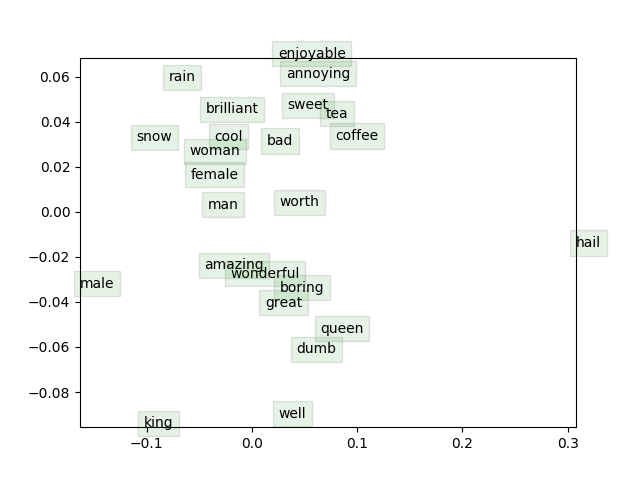


1. Words with similar meaning can cluster together, such as ['amazing', 'wonderful', 'great'], [tea, coffee];
2. The word vectors exhibit some analogy, such as "male : king :: female : queen";
3. The skip-gram model isn't good enough to cluster antinyms correctly, such as 'annoying', 'boring' are not clustered correctly.